In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV, cross_validate
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import PCA

from mlxtend.plotting import plot_decision_regions


In [19]:
# Variables globales
PATH = r'./Data/pacientes_ucic_v3.csv'
random_state = 11
kernel = ['linear']
C = np.arange(-4.0, 2.0)
C = 10**C
param_grid = [{'svm__C': C, 'svm__kernel': kernel}]  # Hay que acceder a los parametros del pipeline como estimator__parameter
class_weight = 'balanced'


In [20]:
# Leemos .csv
df = pd.read_csv(PATH, sep=';', index_col='Unnamed: 0')

# Guardamos los nombres de las columnas
cols = df.columns

# Guardamos los nombres de las columnas de salida
y_cols = []
for col in cols:
    y_cols.append(col) if 'Situación al alta' in col else None

# Columnas de entrada y de salida
X_cols = df.drop(y_cols, axis=1).columns
y_col = 'Situación al alta de UCI.Estable no precisa cuidados especiales'

# Separamos en entrada (X) y salida (y)
X = df[X_cols]
y = df[y_col]


In [21]:
# Declaramos los Imputer que insertarán valores en los NaN
imputer_media = SimpleImputer(strategy='mean')
imputer_moda = SimpleImputer(strategy='most_frequent')

# Declaramos los Scaler que estandarizarán los datos
scaler_media = StandardScaler()
scaler_moda = StandardScaler()

# Creamos un ColumnTransformer para el SimpleImputer
imputer = ColumnTransformer([
    ('imputer_media', imputer_media, slice(0, 8)),
    ('imputer_moda', imputer_moda, slice(8, len(X.columns))),
 ])

# Creamos un ColumnTransformer para el StandardScaler
scaler = ColumnTransformer([
    ('scaler_media', scaler_media, slice(0, 8)),
    ('scaler_moda', scaler_moda, slice(8, len(X.columns)))
])

# Creamos el Pipeline incorporando ColumnTransformer y PCA
pipeline = Pipeline([
    ('imputer', imputer),
    ('scaler', scaler),
    ('pca', PCA(n_components=2))
])


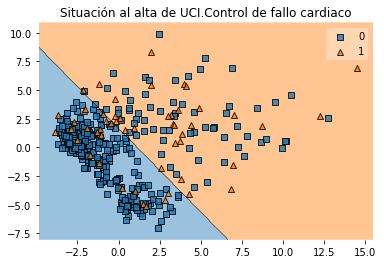

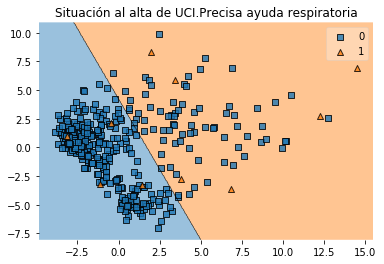

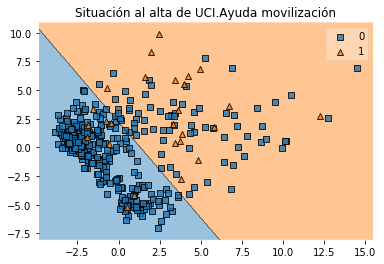

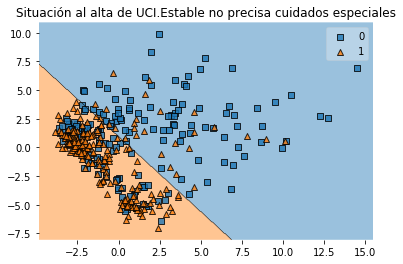

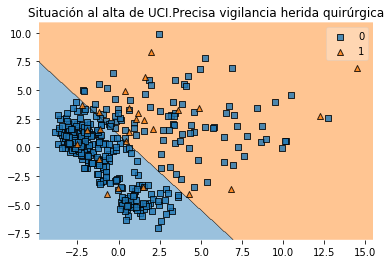

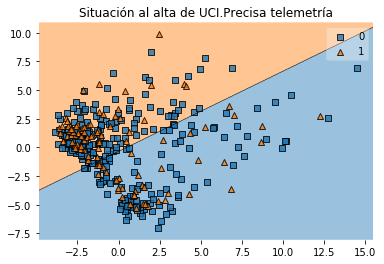

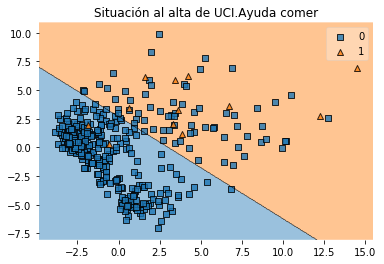

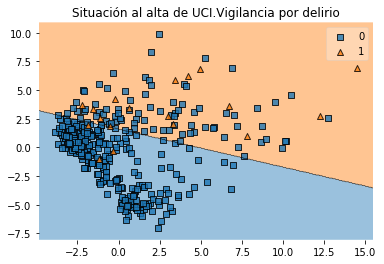

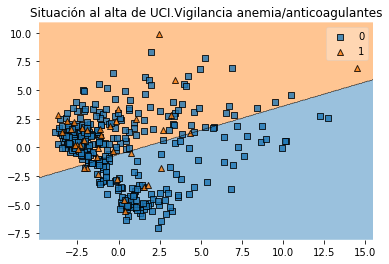

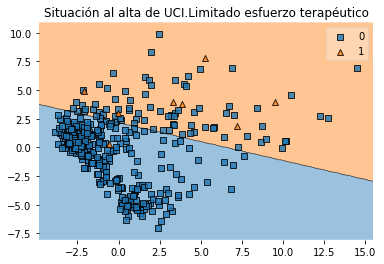

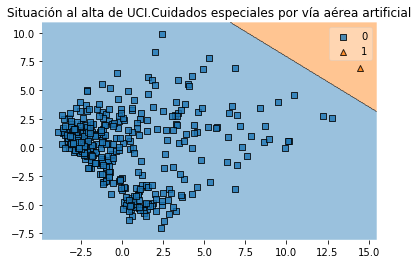

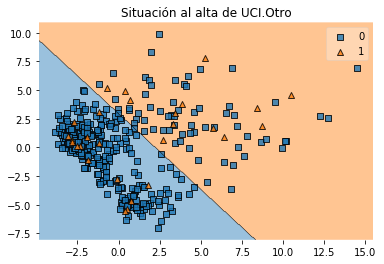

In [22]:
X = pipeline.fit_transform(X)
y = df[y_cols]
for y_col in y_cols:
    clf = SVC(kernel='linear', class_weight='balanced')
    clf.fit(X, y[y_col])
    plot_decision_regions(X, y[y_col].values, clf=clf)
    plt.title(y_col)
    plt.show()
